# Data analysis of the models results

This notebook aims to provide analytical tools to work on the damage functions modeled in the WILIAM model folder. 

## Model import and initialisation

In [28]:
import pysd
import pandas as pd
import netCDF4 as nc
import xarray as xr

In [3]:
reload = True

if reload:
    model = pysd.read_vensim(r'C:\\Users\\gabriel.genelot\\Documents\\damage-functions\\WILIAM_v1.3\\WILIAM.mdl')
else:
    pass

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pysd\builders\python\subscripts.py:337: UserWarning: 
Dimension given by subscripts:
	{'HIGH EDUCATION', 'MEDIUM EDUCATION'}
is incomplete using EDUCATIONAL LEVEL I instead.
Subscript_dict:
	{'A MATRIX YEARS I': ['year1995', 'year1996', 'year1997', 'year1998', 'year1999', 'year2000', 'year2001', 'year2002', 'year2003', 'year2004', 'year2005', 'year2006', 'year2007', 'year2008', 'year2009'], 'AEZ I': ['AEZ TROPICAL', 'AEZ TEMPERATE', 'AEZ ARID', 'AEZ BOREAL'], 'AGE ADULTS I': ['c15c19', 'c20c24', 'c25c29', 'c30c34', 'c35c39', 'c40c44', 'c45c49', 'c50c54', 'c55c59', 'c60c64'], 'AGE CHAIN I': ['c5c9', 'c10c14', 'c15c19', 'c20c24', 'c25c29', 'c30c34', 'c35c39', 'c40c44', 'c45c49', 'c50c54', 'c55c59', 'c60c64', 'c65c69', 'c70c74', 'c75c79', 'cover80'], 'AGE CHAIN MIDDLE I': ['c5c9', 'c10c14', 'c15c19', 'c20c24', 'c25c29', 'c30c34', 'c35c39', 'c40c44', 'c45c49', 'c50c54', 'c55c59', 'c60c64', 'c65c69', 'c70c74'

## Model runs

In this section, we run the model. 

In [9]:
variables = model.doc
variables.to_csv(r'C:\\Users\\gabriel.genelot\\Documents\\variables.csv')

Parameters that are useful to modify : 

FINAL TIME	final_time		Year	(nan, nan)	Constant	Normal	The final time for the simulation.

1429	INITIAL TIME	initial_time		Year	(nan, nan)	Constant	Normal	Initial time for the simulation of WILIAM. DO NOT MODIFY!!


In [14]:
initial_time = 2005
final_time = 2006 

In [33]:
run = model.run(progress=True, 
                return_columns=["fund_total_agricultural_impact"],
                final_time=final_time,  
                output_file='results/results_agri.nc')

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pysd\py_backend\data.py:220: UserWarning: _ext_data_co2_tax_sectors_sp
extrapolating data below the minimum value of the time
  warnings.warn(
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pysd\py_backend\data.py:220: UserWarning: _ext_data_share_pv_subtechnologies_before_2020
extrapolating data below the minimum value of the time
  warnings.warn(
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: d

Results stored in results\results_agri.nc


In [38]:
ds.close()

In [55]:
ds = xr.open_dataset('results/results_agri.nc')
ds.close()

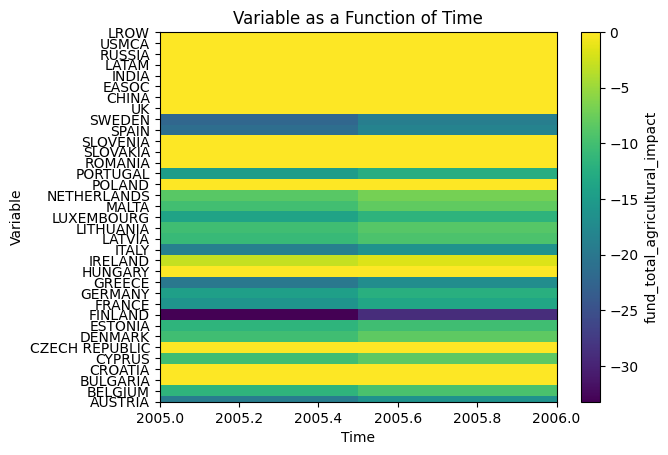

In [54]:
import matplotlib.pyplot as plt

# Plot a variable as a function of time
ds['fund_total_agricultural_impact'].plot(x='time')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Variable')
plt.title('Variable as a Function of Time')

# Show the plot
plt.show()
ds.close()

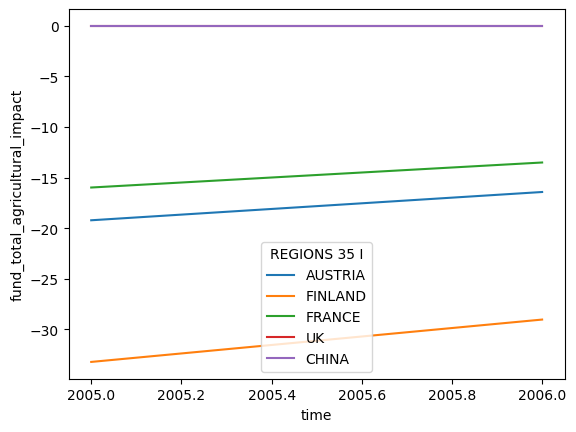

In [53]:
import seaborn as sns

data = ds['fund_total_agricultural_impact'].to_dataframe().reset_index()
data = data[data['REGIONS 35 I'].isin(['AUSTRIA', 'FRANCE', 'FINLAND', 'UK', 'CHINA'])]
sns.lineplot(data, x='time', y='fund_total_agricultural_impact', hue='REGIONS 35 I')
ds.close()

In [52]:
ds.close()
print(ds.variables.keys())
ds.close()

KeysView(Frozen({'A MATRIX YEARS I': <xarray.IndexVariable 'A MATRIX YEARS I' (A MATRIX YEARS I: 15)> Size: 480B
array(['year1995', 'year1996', 'year1997', 'year1998', 'year1999', 'year2000',
       'year2001', 'year2002', 'year2003', 'year2004', 'year2005', 'year2006',
       'year2007', 'year2008', 'year2009'], dtype='<U8'), 'AEZ I': <xarray.IndexVariable 'AEZ I' (AEZ I: 4)> Size: 208B
array(['AEZ TROPICAL', 'AEZ TEMPERATE', 'AEZ ARID', 'AEZ BOREAL'], dtype='<U13'), 'AGE ADULTS I': <xarray.IndexVariable 'AGE ADULTS I' (AGE ADULTS I: 10)> Size: 240B
array(['c15c19', 'c20c24', 'c25c29', 'c30c34', 'c35c39', 'c40c44', 'c45c49',
       'c50c54', 'c55c59', 'c60c64'], dtype='<U6'), 'AGE CHAIN I': <xarray.IndexVariable 'AGE CHAIN I' (AGE CHAIN I: 16)> Size: 448B
array(['c5c9', 'c10c14', 'c15c19', 'c20c24', 'c25c29', 'c30c34', 'c35c39',
       'c40c44', 'c45c49', 'c50c54', 'c55c59', 'c60c64', 'c65c69', 'c70c74',
       'c75c79', 'cover80'], dtype='<U7'), 'AGE CHAIN MIDDLE I': <xarray.IndexVar

## Results visualisation